# CS550 Exam Solution

### Solving question 2 of Exam

### Below is the MDP for the problem

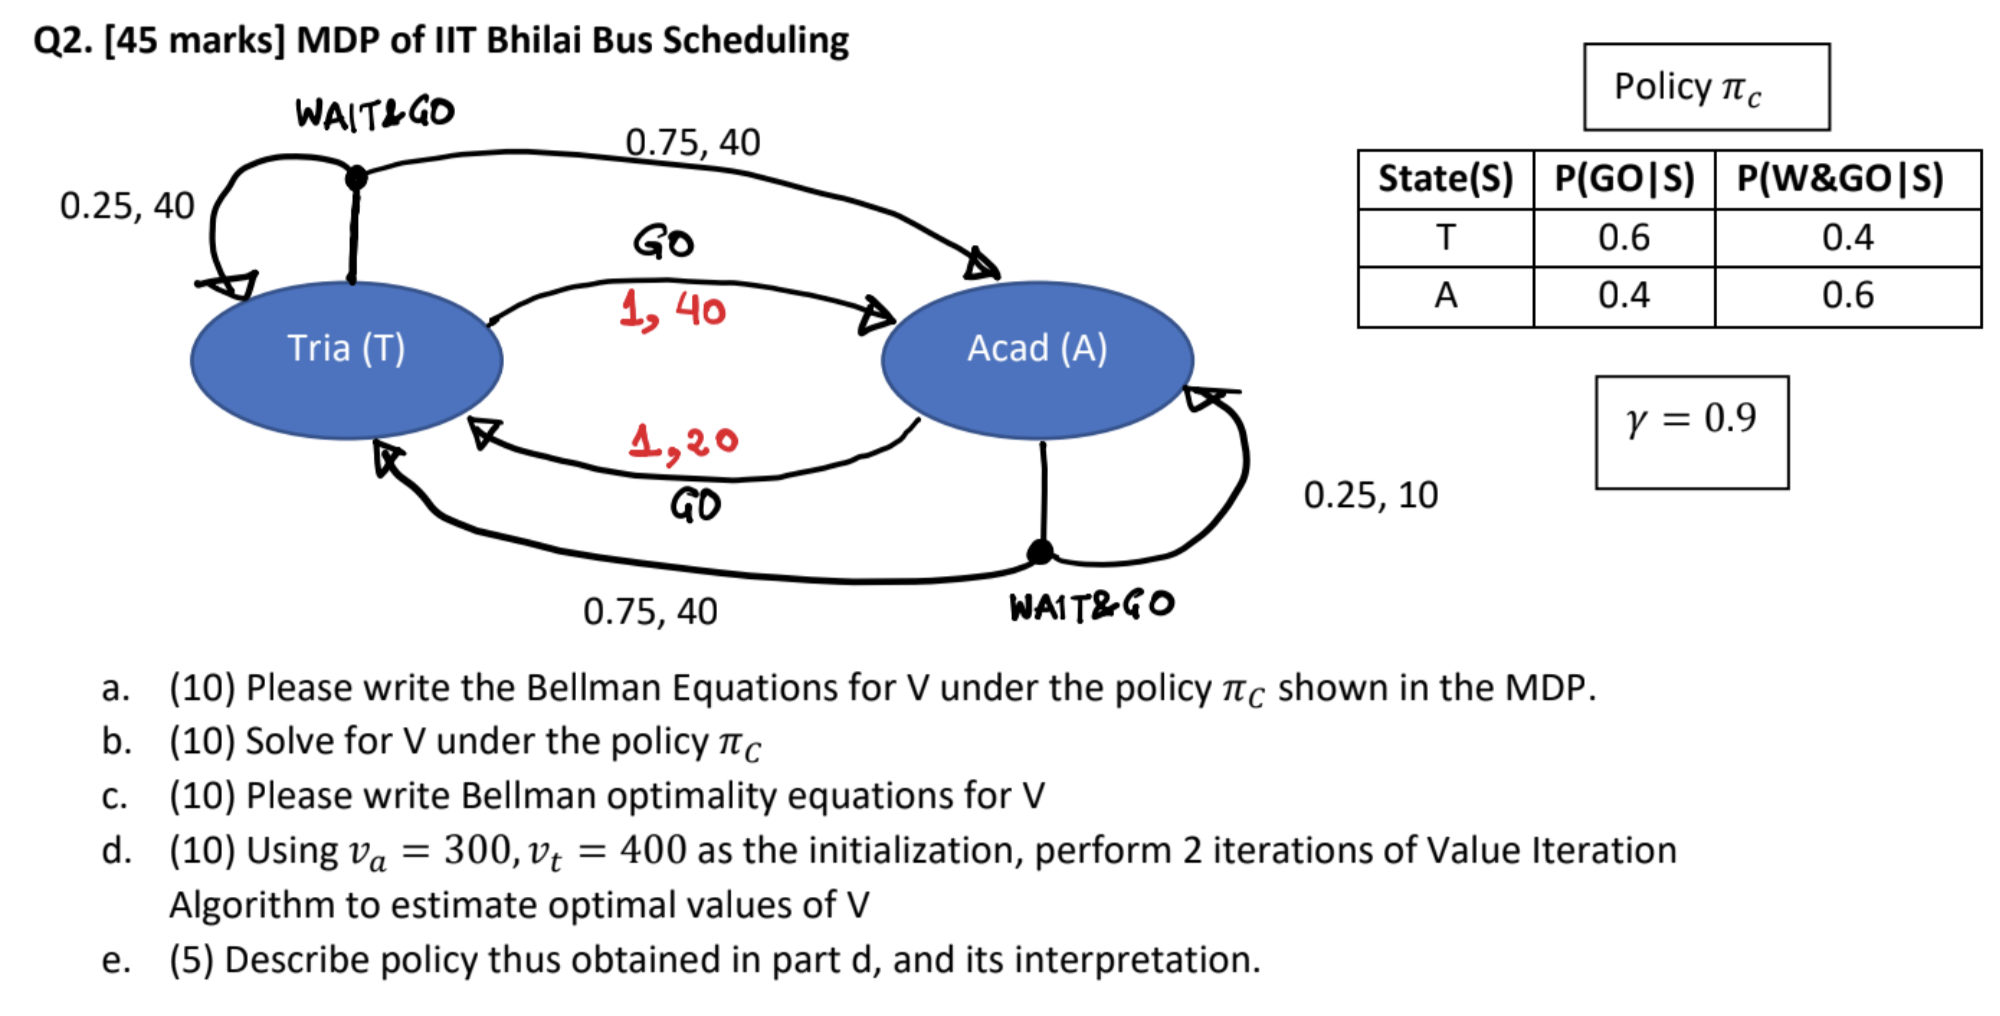

#### I have solved the above MDP using Value Iteration Method and then found the best policy. (Essentially the (d) and (e) part.)

Defining the MDP in code

In [1]:
import numpy as np

# Need to first Represent the Markov Decision Process in a Data Structure

# Define the States
S = ['A', 'T']

# Define the Actions
A = ['W&GO', 'GO']

Define Transitions and Rewards

In [2]:
# Define the Transitions and Rewards

# Transition Probabilities
transitions = []
# Transition looks like this : [State, Action, Next State, Probability, Reward]
transitions.append(['T', 'GO', 'A', 1, 40])
transitions.append(['A', 'GO', 'T', 1, 20])
transitions.append(['T', 'W&GO', 'A', 0.75, 40])
transitions.append(['T', 'W&GO', 'T', 0.25, 40])
transitions.append(['A', 'W&GO', 'A', 0.75, 40])
transitions.append(['A', 'W&GO', 'T', 0.25, 20])

transitions

[['T', 'GO', 'A', 1, 40],
 ['A', 'GO', 'T', 1, 20],
 ['T', 'W&GO', 'A', 0.75, 40],
 ['T', 'W&GO', 'T', 0.25, 40],
 ['A', 'W&GO', 'A', 0.75, 40],
 ['A', 'W&GO', 'T', 0.25, 20]]

Defining Policy

In [3]:
policy = {
    'GO': {
        'A': 0.4,
        'T': 0.6
    },
    'W&GO': {
        'A': 0.6,
        'T': 0.4
    }
}

policy

{'GO': {'A': 0.4, 'T': 0.6}, 'W&GO': {'A': 0.6, 'T': 0.4}}

Discount Factor

In [4]:
gamma = 0.9

**We have Defined the MDP now**

## Solving the MDP using Value Iteration

### Value Iteration Method

Below Pseudo-Code is taken from the Barto & Sutton Book which was taught in the CS550 Course

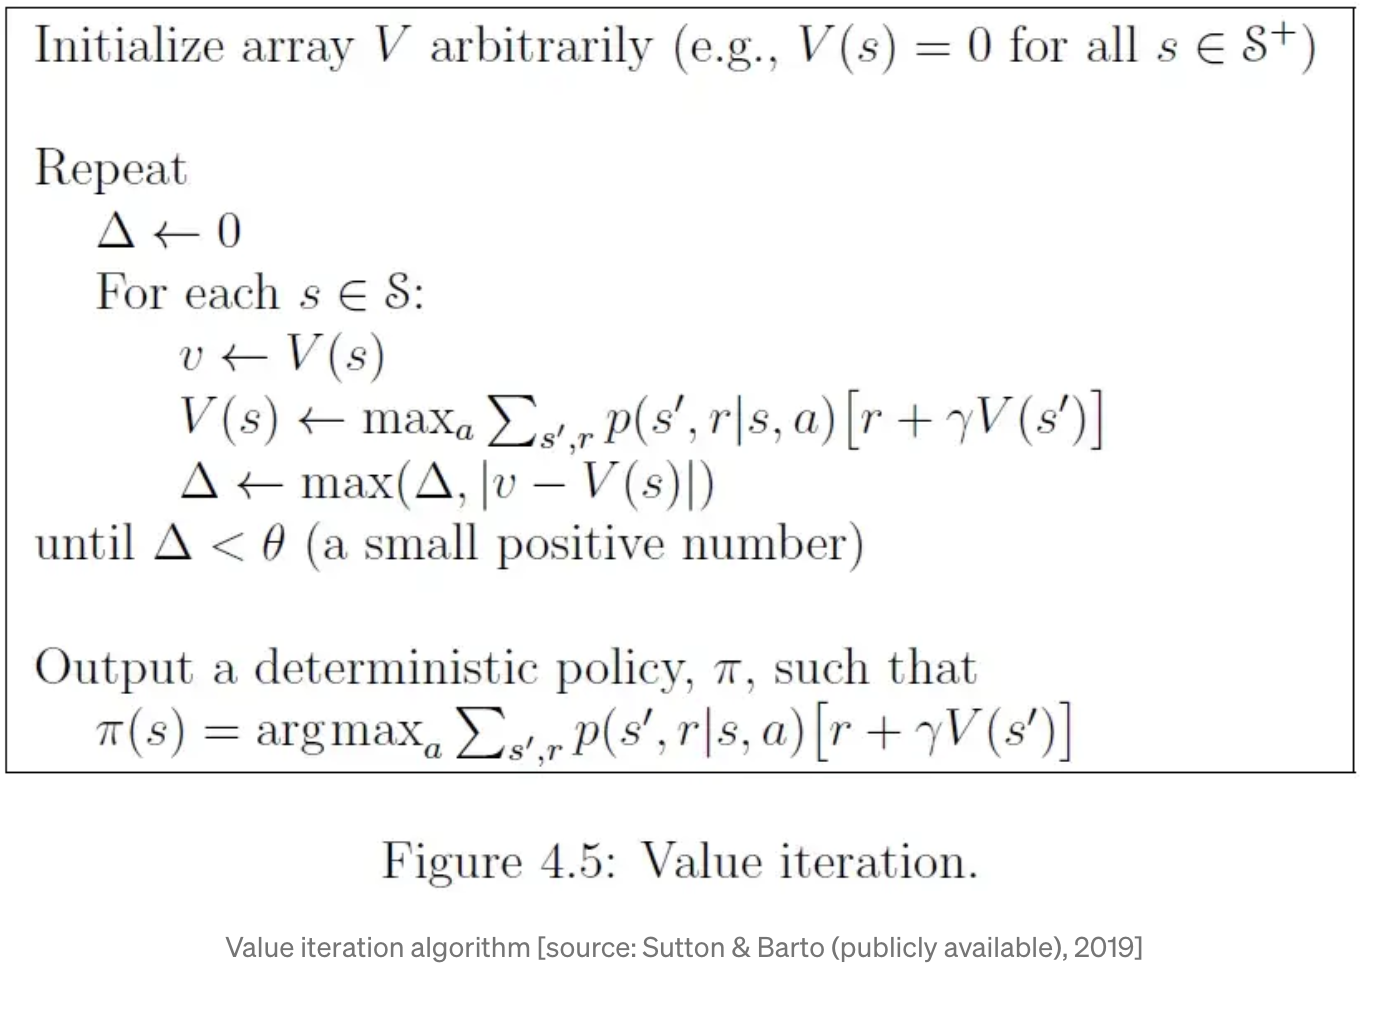

**Code Implementation**

In [5]:
# Initialize V(s) = Random for all s in S
V = {
    'A': 300,
    'T': 400
}

num_iterations = 0

# Repeat until convergence:
while True:

    num_iterations += 1

    # Delta = 0
    delta = 0

    # For each state s in S:
    for s in S:

        # v = V(s)
        v = V[s]

        # V(s) = max_a sum_s' sum_r (P(s',r|s,a) * [r + gamma * V(s')])
        best_action = None
        best_value = -np.inf
        for a in A:
            value = 0
            for t in transitions:
                if t[0] == s and t[1] == a:
                    value += t[3] * (t[4] + gamma * V[t[2]])
            if value > best_value:
                best_value = value
                best_action = a
        V[s] = best_value

        # Delta = max(Delta, abs(v - V(s)))
        delta = max(delta, abs(v - V[s]))

    # If Delta < theta: (Convergence)
    if delta < 1e-7:

        # break
        break

**Best Values**

In [6]:
V

{'A': 361.2500007152121, 'T': 366.25000064882863}

**Finding Best Policy**

In [7]:
# Now output a deterministic policy such that:
# pi(s) = argmax_a sum_s' sum_r (P(s',r|s,a) * [r + gamma * V(s')])

# Initialize pi(s) = Random for all s in S
pi = {
    'A': 'GO',
    'T': 'GO'
}

# For each state s in S:
for s in S:
    
        # pi(s) = argmax_a sum_s' sum_r (P(s',r|s,a) * [r + gamma * V(s')])
        best_action = None
        best_value = -np.inf
        for a in A:
            value = 0
            for t in transitions:
                if t[0] == s and t[1] == a:
                    value += t[3] * (t[4] + gamma * V[t[2]])
            if value > best_value:
                best_value = value
                best_action = a
        pi[s] = best_action

pi

{'A': 'W&GO', 'T': 'W&GO'}

**Interpretation of the Policy:**

It always says to take the action ```wait&go``` to maximise your profit.